In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

device = torch.device('cuda:0')
steps  = 201
pp   = torch.tensor(.8)
h    = torch.log(pp/(1-pp))/2
k    = 3
d    = 1000
bs   = 200
ts   = torch.linspace(0, 1, steps)
x    = torch.randn(d, bs, device=device) * d**(1/2)
xs   = [x]
inv_t  = 2
fp_eqn = lambda x: np.tanh(inv_t * x) - x 
m      = torch.tensor(newton(fp_eqn, 1))

tau  = lambda t: (1-(k/d**(1/2))**2)**(1/2)*2*t if t < 1/2 else (1-(k*(2-2*t)/d**(1/2))**2)**(1/2)
taup = lambda t: (1-(k/d**(1/2))**2)**(1/2)*2 if t < 1/2 else 2*k**2*(2-2*t)/(d * tau(t))

b_over_a = lambda t: tau(t) / (d*(1-tau(t)**2))
W_plus   = torch.exp(h * m) / (2 * torch.cosh(h * m))
W_minus  = torch.exp(-h * m) / (2 * torch.cosh(h * m))
logQp    = lambda x, t: torch.sum(torch.log(1 + m * torch.tanh(x * b_over_a(t))), 0)
logQm    = lambda x, t: torch.sum(torch.log(1 - m * torch.tanh(x * b_over_a(t))), 0)

def cond_exp(x, t):
    # Q_p > Q_m
    pgm = logQp(x, t) >= logQm(x, t)
    Q_mp = torch.exp((logQm(x, t) - logQp(x, t)) * pgm)
    num = W_plus * torch.tanh(inv_t * m + x * b_over_a(t))\
          + W_minus * Q_mp * torch.tanh(-inv_t * m + x * b_over_a(t)) 
    den = W_plus + W_minus * Q_mp
    eta_mp = num / den
    
    # Q_m > Q_p
    mgp = logQp(x, t) < logQm(x, t)
    Q_pm = torch.exp((logQp(x, t) - logQm(x, t)) * mgp)
    num = W_plus * Q_pm * torch.tanh(inv_t * m + x * b_over_a(t))\
          + W_minus * torch.tanh(-inv_t * m + x * b_over_a(t)) 
    den = W_plus * Q_pm + W_minus
    eta_pm = num / den

    # put together
    return eta_mp * pgm + eta_pm * mgp

bf = lambda x, t: (-tau(t)*taup(t) * x + taup(t) * cond_exp(x, t))/(1-tau(t)**2)

for i, t in enumerate(ts[:-1]):
    if i % 10 == 0: print(t)
    dt = ts[i+1] - ts[i]
    x = x + bf(x, t) * dt
    xs.append(x)

xs = torch.stack(xs)

tensor(0.)
tensor(0.0500)
tensor(0.1000)
tensor(0.1500)
tensor(0.2000)
tensor(0.2500)
tensor(0.3000)
tensor(0.3500)
tensor(0.4000)
tensor(0.4500)
tensor(0.5000)
tensor(0.5500)
tensor(0.6000)
tensor(0.6500)
tensor(0.7000)
tensor(0.7500)
tensor(0.8000)
tensor(0.8500)
tensor(0.9000)
tensor(0.9500)


In [28]:
[taup(t) for t in ts]

[1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583591706,
 1.9909796583

In [22]:
ms = xs.mean(1).cpu().numpy()

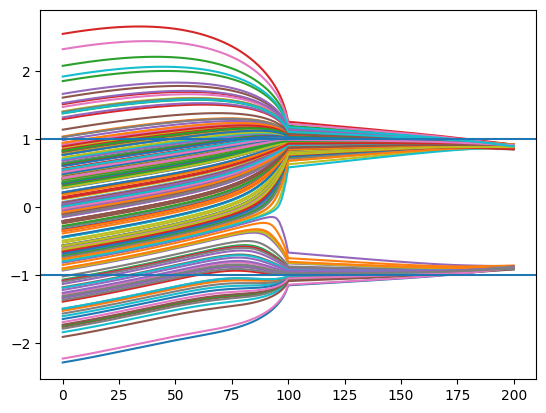

In [23]:
plt.plot(ms);
#plt.ylim(-.1,.1)
plt.axhline(1, 0, 200)
plt.axhline(-1, 0, 200)

In [24]:
(ms[-1] > 0).mean()

np.float64(0.81)

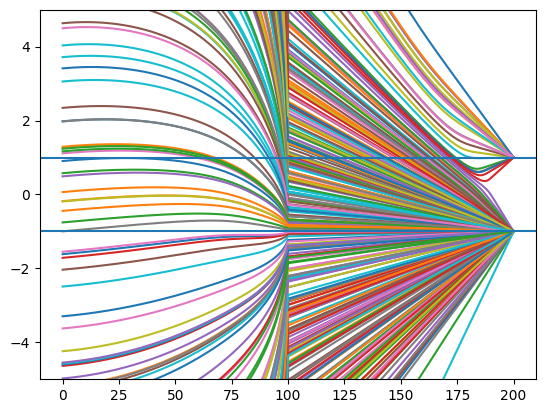

In [25]:
plt.plot(xs[:, :300, 1].cpu().numpy());
plt.ylim(-5,5)
plt.axhline(1, 0, 200)
plt.axhline(-1, 0, 200)

In [26]:
for i in range(steps): print(np.mean(xs[i, :, 0].cpu().numpy() > 0)*2-1)

-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.02200000000000002
-0.020000000000000018
-0.020000000000000018
-0.020000000000000018
-0.020000000000000018
-0.020000000000000018
-0.020000000000000018
-0.0200